# Random Forest 

Ejemplo de uso de un modelo de machine learning supervisado para realizar la regresion de una variable desconocida

In [81]:
cd C:\Users\GermanBo\Desktop\Kschool\proyectos\spad

C:\Users\GermanBo\Desktop\Kschool\proyectos\spad


C:\Users\GermanBo\AppData\Roaming\Python\Python312\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [82]:
!dir

 El volumen de la unidad C no tiene etiqueta.
 El n�mero de serie del volumen es: DEF4-F44C

 Directorio de C:\Users\GermanBo\Desktop\Kschool\proyectos\spad

01/02/2024  17:50    <DIR>          .
01/02/2024  17:50    <DIR>          ..
01/01/1980  02:00             3.828 DX20220322.dat
01/01/1980  02:00            21.349 DX20220323.dat
01/01/1980  02:00            16.570 DX20220324.dat
28/03/2022  23:46            12.170 DX20220325.dat
01/01/1980  02:00             7.649 DX20220326.dat
01/01/1980  02:00             8.548 DX20220327.dat
01/01/1980  02:00             8.979 DX20220328.dat
               7 archivos         79.093 bytes
               2 dirs  164.126.240.768 bytes libres


In [83]:
import pandas as pd 
import numpy as np 

### Fusion tablas

In [84]:

# Mediante  la siguiente funcion vamos a coger todos los archivos generados mediante el instrumento
# Estos archivos se generan siempre con el mismo estandar, lo que permite generar una funcion para todo estos archivos

def sp(panda):
    #lectura
    spad1= pd.read_csv(panda, skiprows=5, sep = ";")

    #limpienza de Na
    spad1 = spad1[["Chl","Flav","NBI"]].apply( pd.to_numeric, errors='coerce')
    spad1.dropna(subset=['Chl'])

    #Adicion del tiempo 
    spad1["doc"] = str(panda)
    spad1["t"] =  spad1["doc"].str.replace(".dat", "").str[-2:]

    # generacion de grupos
    spad1["trat"]= [x+1 for x in range(spad1.shape[0])]
    condicion = [(spad1['trat'] < 10),
            (spad1['trat'] >= 10) & (spad1['trat'] < 20),
            (spad1['trat'] >= 20) & (spad1['trat'] < 30),
            (spad1['trat'] >= 30) & (spad1['trat'] < 40),
            (spad1['trat'] >= 40) & (spad1['trat'] < 50),
            (spad1['trat'] >= 50) & (spad1['trat'] < 60)
             ]
    valores = ["Fe-","Fe+","FeS1","FeS2","Bic1","Bic2"]
    spad1["trat"] = np.select(condicion, valores, default='Fe')

    return(spad1)



In [85]:
import os

ruta_directorio_actual = os.getcwd()
archivos = os.listdir(ruta_directorio_actual)

total = list(map(sp, archivos))

dt = pd.concat(total)
dt.head()

,Chl,Flav,NBI,doc,t,trat
0,15.374,0.478,32.19,DX20220322.dat,22,Fe-
1,15.370,0.479,32.09,DX20220322.dat,22,Fe-
2,18.018,0.422,42.71,DX20220322.dat,22,Fe-
3,27.913,0.702,39.78,DX20220322.dat,22,Fe-
4,24.830,0.482,51.47,DX20220322.dat,22,Fe-


### Limpieza de datos

In [86]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1349 entries, 0 to 152
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Chl     1101 non-null   float64
 1   Flav    910 non-null    float64
 2   NBI     909 non-null    float64
 3   doc     1349 non-null   object 
 4   t       1349 non-null   object 
 5   trat    1349 non-null   object 
dtypes: float64(3), object(3)
memory usage: 73.8+ KB


In [87]:
#Vamos a eliminar todos los Na ya que un fallo en uno de los parametros significa que el resto de parametros ofrecidos no es fiable en esa medicion
dt_1 = dt.dropna()

# Tambien vamos a eliminar el tratamiento "Fe" ya que este engloga diversos tratamientos que no siquieron un orden establecido
dt_1 = dt_1[dt_1["trat"] != "Fe"]

dt_1["t"] = dt_1["t"].astype(float)

dt_1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 58
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Chl     297 non-null    float64
 1   Flav    297 non-null    float64
 2   NBI     297 non-null    float64
 3   doc     297 non-null    object 
 4   t       297 non-null    float64
 5   trat    297 non-null    object 
dtypes: float64(4), object(2)
memory usage: 16.2+ KB


### Analisis exploratorio 

#### Variable categorica

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt



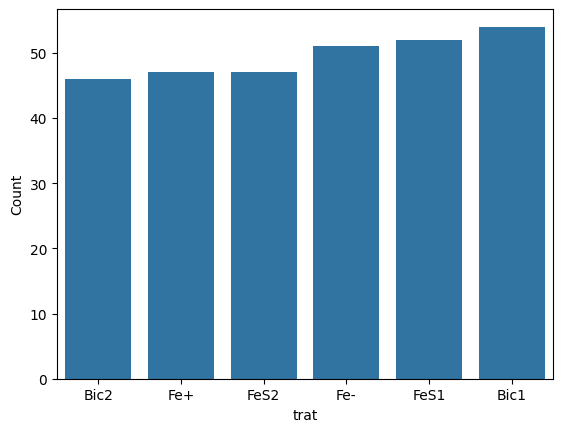

In [89]:

conteo = dt_1["trat"].value_counts().sort_values()


sns.barplot(x =conteo.index, y = conteo)
plt.xlabel('trat')
plt.ylabel('Count')
plt.show()

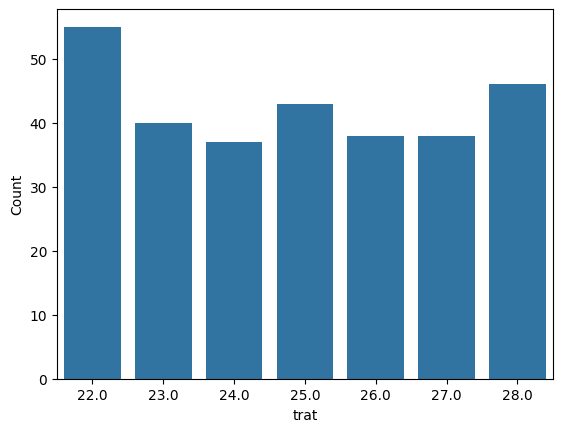

In [90]:
conteo = dt_1["t"].value_counts().sort_values()


sns.barplot(x =conteo.index, y = conteo)
plt.xlabel('trat')
plt.ylabel('Count')
plt.show()

Al realizar este analisis previo de las variables cateogircas podemos apreciar que no hay nada extraño que nos haga sospechar de estas variables 


#### Variables numericas

In [91]:
dt_1.describe()


,Chl,Flav,NBI,t
count,297.000000,297.000000,297.000000,297.00000
mean,24.298707,0.526852,46.058215,24.89899
std,9.768480,0.108062,17.693002,2.09001
min,2.456000,0.335000,5.350000,22.00000
25%,16.843000,0.446000,34.420000,23.00000
50%,24.573000,0.508000,43.940000,25.00000
75%,31.510000,0.579000,55.140000,27.00000
max,65.612000,0.858000,106.480000,28.00000


<Figure size 2000x1000 with 0 Axes>

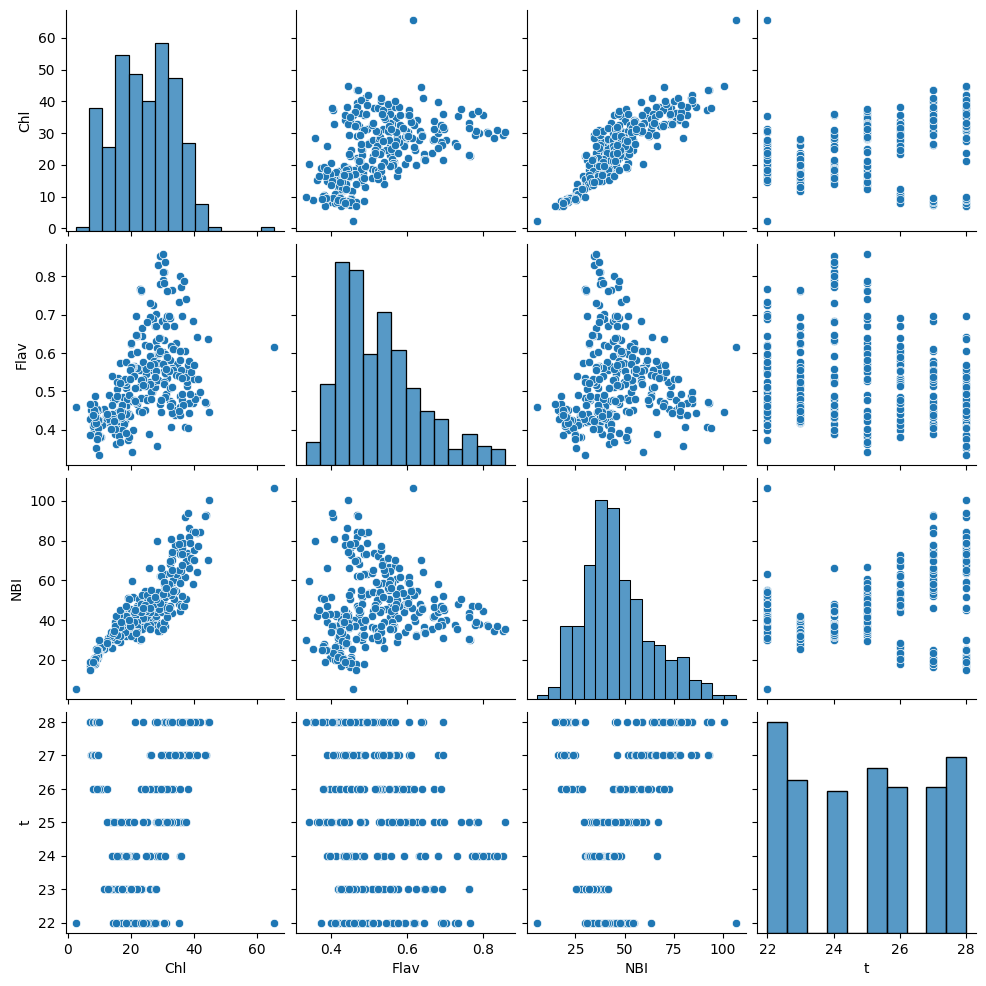

In [92]:

plt.figure(figsize=(20,10))
sns.pairplot(dt_1)

In [93]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

           Chl      Flav       NBI
Chl   1.000000  0.470749  0.880296
Flav  0.470749  1.000000  0.016853
NBI   0.880296  0.016853  1.000000


<Axes: >

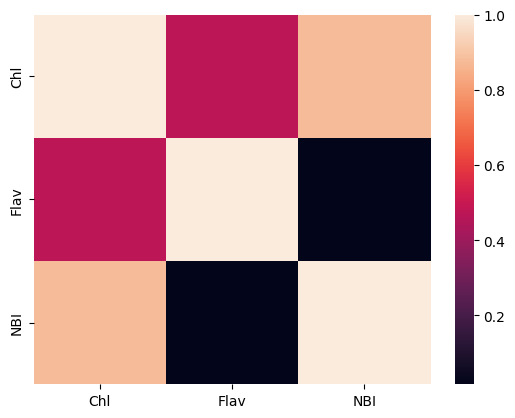

In [94]:
dt_escalado= dt_1.copy()
dt_escalado[["Chl","Flav","NBI"]] = scaler.fit_transform(dt_1[["Chl","Flav","NBI"]])
correlacion = dt_escalado[["Chl","Flav","NBI"]].corr()

print(correlacion)
sns.heatmap(correlacion)

Con estas visualizacions podemos apreciar como se da una correlacion entre la variable objetivo Chl y las variables Flav y NBI

##### Graficas variable objetivo

In [95]:
dt_chl = dt_1.groupby(["trat","t"])["Chl"].describe().reset_index()
dt_chl.head()

,trat,t,count,mean,std,min,25%,50%,75%,max
0,Bic1,22.0,9.0,22.968111,2.294703,19.513,21.65200,22.8750,24.60200,26.141
1,Bic1,23.0,7.0,17.170714,2.373698,12.882,16.55700,17.2100,18.49600,19.997
2,Bic1,24.0,6.0,28.541667,2.291127,25.262,26.84500,29.6320,30.07675,30.583
3,Bic1,25.0,9.0,30.709667,4.263038,23.995,28.51800,30.2090,30.77100,37.619
4,Bic1,26.0,4.0,31.788750,1.347043,30.445,30.72175,31.8785,32.94550,32.953


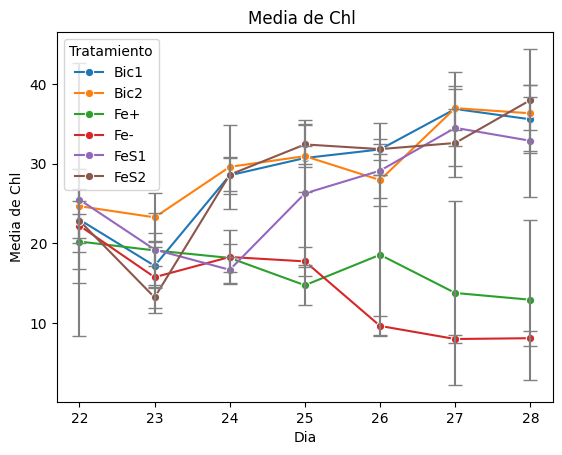

In [96]:

sns.lineplot(data=dt_chl, x="t", y="mean", hue="trat", marker="o", errorbar='sd')
plt.errorbar(dt_chl["t"], dt_chl["mean"], yerr=dt_chl["std"], fmt='none', capsize=5, color='gray')

plt.title("Media de Chl ")
plt.xlabel("Dia")
plt.ylabel("Media de Chl")
plt.legend(title="Tratamiento")
plt.show()

Vemos que hay diferencias , expecialmente en los ultimos dias.

### Prediccion de la evolucion de Chl por Random Forest 

Vamos a usar solo la variables categoricas para intentar predecir los valores de Chl del siguiente dia

In [97]:
#Para el modelo usaremos los datos escalados previamente 

dt_escalado_1 = dt_escalado.copy()
dt_escalado_1.head()

,Chl,Flav,NBI,doc,t,trat
0,-0.915165,-0.452835,-0.785148,DX20220322.dat,22.0,Fe-
1,-0.915575,-0.443565,-0.790809,DX20220322.dat,22.0,Fe-
2,-0.644042,-0.971929,-0.189559,DX20220322.dat,22.0,Fe-
3,0.370620,1.623544,-0.355441,DX20220322.dat,22.0,Fe-
4,0.054480,-0.415756,0.306388,DX20220322.dat,22.0,Fe-


In [98]:
# Vamos a procesor el dataframe para entrenar el modelo
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)

tra = encoder.fit_transform(dt_escalado_1[["trat"]])
tra = pd.DataFrame(tra)
dt_escalado_1 = dt_escalado_1.drop(["trat","doc","Flav","NBI"], axis= 1) 

dt_escalado_1.reset_index(drop=True, inplace=True)
tra.reset_index(drop=True, inplace=True)

dt_trans = pd.concat([dt_escalado_1,tra], axis=1)

dt_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Chl     297 non-null    float64
 1   t       297 non-null    float64
 2   0       297 non-null    float64
 3   1       297 non-null    float64
 4   2       297 non-null    float64
 5   3       297 non-null    float64
 6   4       297 non-null    float64
 7   5       297 non-null    float64
dtypes: float64(8)
memory usage: 18.7 KB


c:\Users\GermanBo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [99]:

from sklearn.model_selection import train_test_split

predictor = dt_trans.drop("Chl", axis=1).values
target = dt_trans["Chl"].values


x_train, x_test, y_train, y_test = train_test_split(predictor,target , test_size=0.25, random_state=0)


In [100]:
from sklearn.ensemble import RandomForestRegressor

modelo_rf = RandomForestRegressor(random_state=0)
modelo_rf.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [101]:
y_pred = modelo_rf.predict(x_test)

In [102]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 0.31626978072415424
R-squared: 0.7128707902006073


Los resultados indican que el modelo de regresión aleatoria presenta rendimiento decente, ya que tiene un MSE relativamente bajo y un R^2 relativamente alto

In [114]:
# Vamos a generar un dataframe para simular el dia 29 
dt_x = dt_trans[dt_trans["t"]== 28].drop("Chl", axis=1).reset_index(drop=True)
dt_x["t"] = 29.0
X = dt_x.values

In [134]:
# Prediccion de Chl del dia 29 mediante Random Forest 

Y = modelo_rf.predict(X)
df_prediccion = pd.DataFrame(Y, columns=["Chl"])


In [116]:
dt_29d = pd.concat([df_prediccion,dt_x], axis= 1)
dt_29d.head()

,Chl,t,0,1,2,3,4,5
0,-1.644459,29.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-1.644459,29.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-1.644459,29.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-1.644459,29.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-1.644459,29.0,0.0,0.0,0.0,1.0,0.0,0.0


In [117]:
#Vamos a crear de nuevo la variable cateogirca original para que sea legible 
variable = dt_29d.iloc[: , 2:]
variable.head()

decodificado = encoder.inverse_transform(variable)
decodificado = pd.DataFrame(decodificado, columns=["trat"])
decodificado.head()

dt_29d = pd.concat([df_prediccion,decodificado], axis= 1)
dt_29d.head()

,Chl,trat
0,-1.644459,Fe-
1,-1.644459,Fe-
2,-1.644459,Fe-
3,-1.644459,Fe-
4,-1.644459,Fe-


### Graficado con la prevision del dia 29 

In [120]:
dt_original = dt_escalado[["Chl","trat","t"]]
dt_original.head()

,Chl,trat,t
0,-0.915165,Fe-,22.0
1,-0.915575,Fe-,22.0
2,-0.644042,Fe-,22.0
3,0.370620,Fe-,22.0
4,0.054480,Fe-,22.0


In [123]:
dt_29d["t"]=29.0
dt_29d.head()

,Chl,trat,t
0,-1.644459,Fe-,29.0
1,-1.644459,Fe-,29.0
2,-1.644459,Fe-,29.0
3,-1.644459,Fe-,29.0
4,-1.644459,Fe-,29.0


In [124]:
dt_final= pd.concat([dt_original,dt_29d], axis= 0)
dt_final

,Chl,trat,t
0,-0.915165,Fe-,22.0
1,-0.915575,Fe-,22.0
2,-0.644042,Fe-,22.0
3,0.370620,Fe-,22.0
4,0.054480,Fe-,22.0
...,...,...,...
41,1.180947,Bic2,29.0
42,1.180947,Bic2,29.0
43,1.180947,Bic2,29.0
44,1.180947,Bic2,29.0


In [133]:
final = dt_final.groupby(["trat","t"])["Chl"].describe().reset_index()
final.head()

,trat,t,count,mean,std,min,25%,50%,75%,max
0,Bic1,22.0,9.0,-0.136443,0.235305,-0.490740,-0.271401,-0.145991,0.031101,0.188914
1,Bic1,23.0,7.0,-0.730925,0.243406,-1.170702,-0.793857,-0.726896,-0.595026,-0.441109
2,Bic1,24.0,6.0,0.435085,0.234939,0.098779,0.261104,0.546891,0.592497,0.644409
3,Bic1,25.0,9.0,0.657398,0.437144,-0.031143,0.432658,0.606058,0.663687,1.365901
4,Bic1,26.0,4.0,0.768050,0.138130,0.630258,0.658637,0.777254,0.886667,0.887436


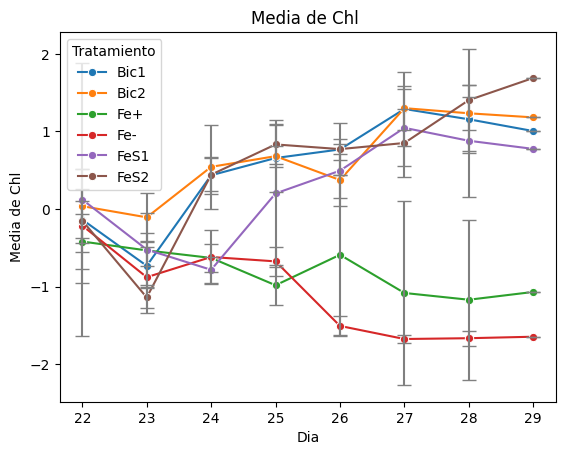

In [131]:

sns.lineplot(data=final, x="t", y="mean", hue="trat", marker="o", errorbar='sd')
plt.errorbar(final["t"], final["mean"], yerr=final["std"], fmt='none', capsize=5, color='gray')

plt.title("Media de Chl ")
plt.xlabel("Dia")
plt.ylabel("Media de Chl")
plt.legend(title="Tratamiento")
plt.show()

Como resultado tenemos la estimacion de los valores de Chl para el siguiente dia. Esta estimacion no presenta una fiabilidad muy elevada, ya que solo nos estamos guiando por los valores previos , pero nos puede servir para hacer una estimacion de las tendencias futuras 